<a href="https://colab.research.google.com/github/kevlord997/ML_Algorithmic_Trading_Projects/blob/Lesson-1/ML_Trading_L1_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas matplotlib --quiet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries installed and imported successfully!")

Libraries installed and imported successfully!


In [2]:
# 1. Define the ticker and time period
ticker = "SPY"
start_date = "2010-01-01"
end_date = "2024-01-01"

# 2. Download the data
spy_data = yf.download(ticker, start=start_date, end=end_date)

# 3. Display the first few rows (the "head" of the data)
print(f"\n--- Data for {ticker} ---")
print(spy_data.head())
print(f"\nShape of the data (Rows, Columns): {spy_data.shape}")

/tmp/ipython-input-3654442067.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


--- Data for SPY ---
Price           Close       High        Low       Open     Volume
Ticker            SPY        SPY        SPY        SPY        SPY
Date                                                             
2010-01-04  85.279205  85.324353  83.909682  84.556820  118944600
2010-01-05  85.504913  85.542540  84.917976  85.226497  111579900
2010-01-06  85.565163  85.775858  85.354468  85.422189  116074400
2010-01-07  85.926361  86.031709  85.166349  85.407144  131091100
2010-01-08  86.212280  86.249907  85.527521  85.700590  126402800

Shape of the data (Rows, Columns): (3522, 5)


In [3]:
spy_data.columns = spy_data.columns.get_level_values(0)
spy_data.rename(columns={'Close': 'Adj Close'}, inplace=True)

In [4]:
spy_data.head()

Price,Adj Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,85.279205,85.324353,83.909682,84.556820,118944600
2010-01-05,85.504913,85.542540,84.917976,85.226497,111579900
2010-01-06,85.565163,85.775858,85.354468,85.422189,116074400
2010-01-07,85.926361,86.031709,85.166349,85.407144,131091100
2010-01-08,86.212280,86.249907,85.527521,85.700590,126402800


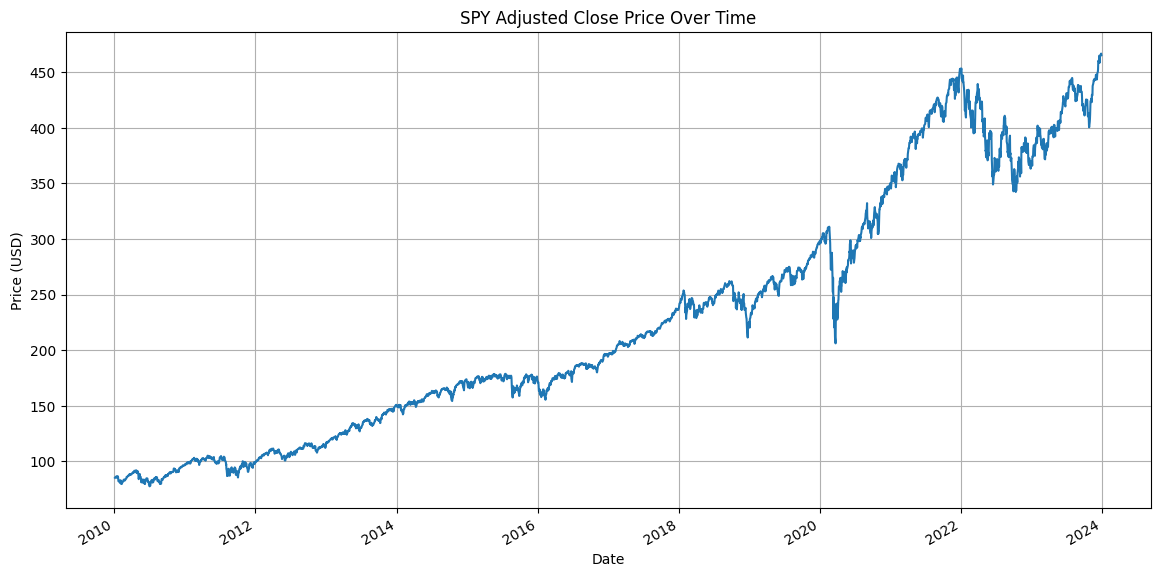

In [5]:
# Plotting the Adjusted Closing Price
plt.figure(figsize=(14, 7))
spy_data['Adj Close'].plot(title=f'{ticker} Adjusted Close Price Over Time',
                           xlabel='Date',
                           ylabel='Price (USD)',
                           grid=True)
plt.show()

In [6]:
# 1. Calculate the 20-day SMA (Short-term trend)
spy_data['SMA_20'] = spy_data['Adj Close'].rolling(window=20).mean()

# 2. Calculate the 100-day SMA (Long-term trend)
spy_data['SMA_100'] = spy_data['Adj Close'].rolling(window=100).mean()



--- Data with New Features (SMAs) ---
Price        Adj Close        High         Low        Open     Volume  \
Date                                                                    
2023-12-22  463.589142  465.282405  461.680580  463.794673   67160400   
2023-12-26  465.546692  466.456931  463.921948  464.000266   55387000   
2023-12-27  466.388428  466.535236  464.802843  465.341149   68000300   
2023-12-28  466.564606  467.406324  466.143747  466.750572   77158100   
2023-12-29  465.213898  466.897364  463.246583  466.368826  122283100   

Price           SMA_20     SMA_100  
Date                                
2023-12-22  452.155635  431.346145  
2023-12-26  453.281465  431.641669  
2023-12-27  454.427448  431.965329  
2023-12-28  455.597836  432.252867  
2023-12-29  456.613443  432.545938  


In [8]:

print("\n--- Data with New Features (SMAs) ---")
spy_data.head(20)


--- Data with New Features (SMAs) ---


Price,Adj Close,High,Low,Open,Volume,SMA_20,SMA_100
Date,,,,,,,
2010-01-04,85.279205,85.324353,83.909682,84.556820,118944600,NaN,NaN
2010-01-05,85.504913,85.542540,84.917976,85.226497,111579900,NaN,NaN
2010-01-06,85.565163,85.775858,85.354468,85.422189,116074400,NaN,NaN
2010-01-07,85.926361,86.031709,85.166349,85.407144,131091100,NaN,NaN
2010-01-08,86.212280,86.249907,85.527521,85.700590,126402800,NaN,NaN
2010-01-11,86.332695,86.633685,85.963973,86.596064,106375700,NaN,NaN
2010-01-12,85.527519,85.941383,85.196424,85.760788,163333500,NaN,NaN
2010-01-13,86.249908,86.490704,85.309301,85.745739,161822000,NaN,NaN
2010-01-14,86.483215,86.641237,86.099446,86.152120,115718800,NaN,NaN


In [9]:
spy_data.dropna(inplace=True)

In [10]:
spy_data.head(20)

Price,Adj Close,High,Low,Open,Volume,SMA_20,SMA_100
Date,,,,,,,
2010-05-26,80.975975,82.713821,80.734188,81.965794,349719300,85.960575,86.090673
2010-05-27,83.688522,83.718746,82.192463,82.502255,300870500,85.579004,86.074766
2010-05-28,82.638260,83.658298,82.245353,83.597849,297933500,85.222368,86.046099
2010-06-01,81.247993,83.076506,81.127103,81.867572,277909400,84.738038,86.002928
2010-06-02,83.363625,83.371176,81.232877,81.663560,240243700,84.466406,85.977300
2010-06-03,83.650749,83.915203,82.796941,83.605416,226618300,84.235574,85.951685
2010-06-04,80.711533,82.608051,80.439522,82.064029,398475600,84.004364,85.895473
2010-06-07,79.706604,81.308445,79.646162,80.998653,264609100,83.786379,85.837264
2010-06-08,80.560410,80.719082,79.071907,79.767044,357774300,83.425965,85.780369


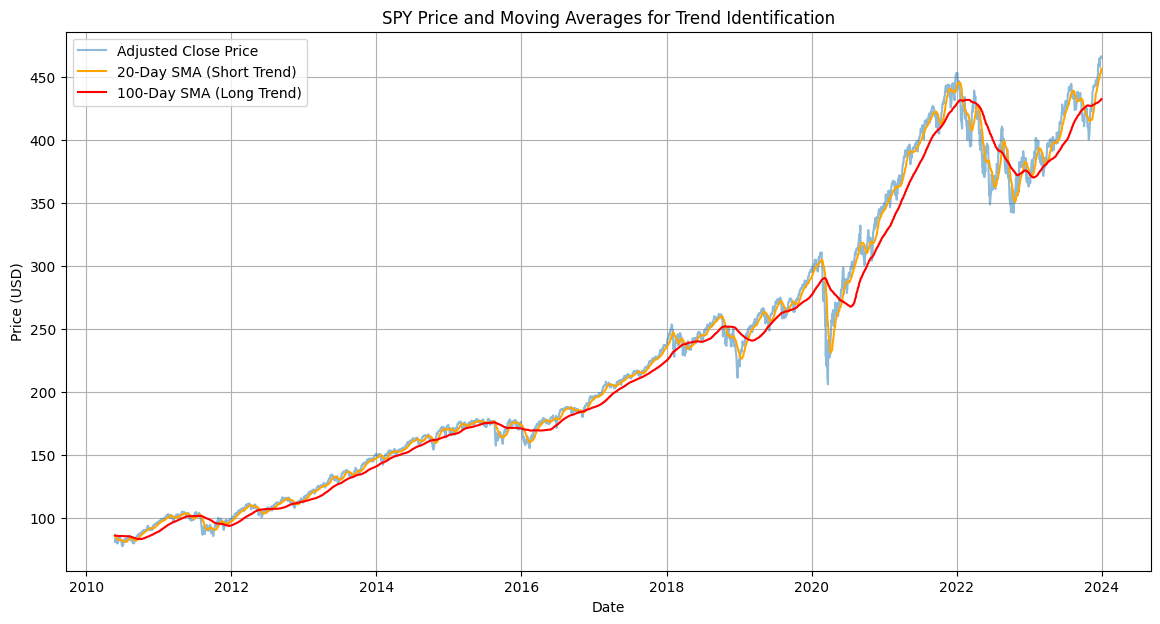

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(spy_data['Adj Close'], label='Adjusted Close Price', alpha=0.5)
plt.plot(spy_data['SMA_20'], label='20-Day SMA (Short Trend)', color='orange')
plt.plot(spy_data['SMA_100'], label='100-Day SMA (Long Trend)', color='red')
plt.title(f'{ticker} Price and Moving Averages for Trend Identification')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()